In [50]:
import pandas as pd
shoplist = pd.read_csv('./shopdata.csv', header = 0, encoding='cp949')
shoplist['브랜드명'] = ''
shoplist.loc[shoplist['사업장명'].str.contains('담꾹'),'브랜드명'] = '담꾹'
shoplist.loc[shoplist['사업장명'].str.contains('오늘쉐프'),'브랜드명'] = '오늘쉐프'
shoplist.loc[shoplist['사업장명'].str.contains('더팜홈쿡'),'브랜드명'] = '더팜홈쿡'
shoplist.loc[shoplist['사업장명'].str.contains('식사준비'),'브랜드명'] = '식사준비'
shoplist.loc[shoplist['사업장명'].str.contains('집어가'),'브랜드명'] = '집어가'
shoplist.loc[shoplist['사업장명'].str.contains('요리비책'),'브랜드명'] = '요리비책'
shoplist.loc[shoplist['사업장명'].str.contains('쿡마스터'),'브랜드명'] = '쿡마스터'
shoplist.loc[shoplist['사업장명'].str.contains('노키친'),'브랜드명'] = '노키친'
shoplist.loc[shoplist['사업장명'].str.contains('땅스'),'브랜드명'] = '땅스부대찌개'
print(shoplist.tail())

#사업장명에서 브랜드 이름을 '띄어쓰기' 기준으로 추출하려 하였으나, 띄어쓰기가 되지 않은 리스트가 있었음
# splitname = shoplist['사업장명'].str.split(' ')
# brand = splitname.str.get(0)
# shoplist['브랜드'] = brand
# print(shoplist.head())

     Unnamed: 0     인허가일자  상세영업상태코드                                    도로명주소  \
141      107698  20210817         1     서울특별시 강북구 오현로**길 *-* 다전빌딩 *층 *호 (번동)   
142      107772  20210819         1            서울특별시 구로구 경인로 *** *층 *호 (오류동)   
143      107845  20210820         1  서울특별시 강서구 방화대로**길 ** 불해빌딩 *층 ***호 (방화동)   
144      107851  20210820         1            서울특별시 용산구 효창원로**나길 * *층 (용문동)   
145      107907  20210823         1             서울특별시 강북구 도봉로**길 ** *층 (미아동)   

     도로명우편번호         사업장명      좌표정보(X)      좌표정보(Y)  브랜드명  
141     1224      더팜홈쿡번동점  203448.8047  458454.6213  더팜홈쿡  
142     8271  식사준비(오류동역점)  186149.0007  443754.9619  식사준비  
143     7595    담꾹 마곡 방화점  184161.3164  452077.9066    담꾹  
144     4356         오늘쉐프  196260.0788  448325.1648  오늘쉐프  
145     1157       노키친미아점  202369.0073  458126.9743   노키친  


In [51]:
ms = shoplist['브랜드명'].value_counts()
print(ms)

담꾹        60
땅스부대찌개    47
오늘쉐프      15
더팜홈쿡       8
집어가        6
식사준비       6
노키친        2
요리비책       1
쿡마스터       1
Name: 브랜드명, dtype: int64


In [71]:
#브랜드의 개수만 세고 싶은데, groupby뒤에 ['브랜드명']을 쓰지 않으니, 모든 열별로 개수를 세서 데이터 프레임으로 추출되었음
brands = shoplist.groupby('브랜드명')['브랜드명'].count()
brcount = brands.sort_values(ascending=False) #매장수가 많은 순서대로 내림차순으로 정렬
brandname = brcount.index
print(brcount)
print(brcount.index)
# print(bybrand.groups)

브랜드명
담꾹        60
땅스부대찌개    47
오늘쉐프      15
더팜홈쿡       8
집어가        6
식사준비       6
노키친        2
쿡마스터       1
요리비책       1
Name: 브랜드명, dtype: int64
Index(['담꾹', '땅스부대찌개', '오늘쉐프', '더팜홈쿡', '집어가', '식사준비', '노키친', '쿡마스터', '요리비책'], dtype='object', name='브랜드명')


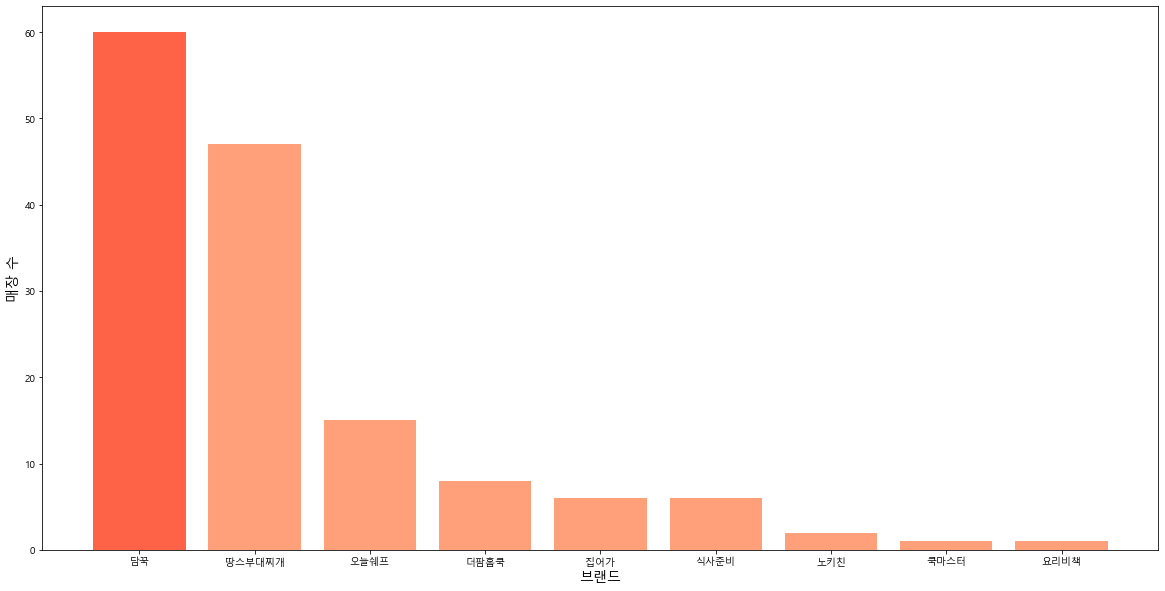

In [86]:
#밀키트 매장 브랜드는 담꾹 60개 매장, 땅스부대찌개 47개 매장으로 시장을 과점하고 있음
import matplotlib.pyplot as plt
plt.rc('font',family='Malgun Gothic')
plt.figure(figsize=(20,10))
barlist = plt.bar(brandname,brcount,color = 'lightsalmon')
barlist[0].set_color('tomato')
plt.xlabel('브랜드', fontsize=14)
plt.ylabel('매장 수', fontsize=14)
plt.show()